In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pickle
import gzip
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def generate_graph(n_start, n_end, connected, filename):
  n = n_start
  if n_start != n_end:
    n = np.random.randint(n_start, n_end)
  if connected:
    p = .6
    G = nx.erdos_renyi_graph(n, p)
    while not nx.is_connected(G):
      G = nx.erdos_renyi_graph(n, p)
  else:
    p = .4
    G = nx.erdos_renyi_graph(n, p)
    while nx.is_connected(G):
      G = nx.erdos_renyi_graph(n, p)
  pos = nx.random_layout(G)
  plt.figure(figsize=(1, 1))
  nx.draw(G, pos, with_labels=False, node_color='blue', node_size=30, edge_color='black', font_size=10)
  plt.savefig(filename, bbox_inches='tight')
  plt.close()


In [ ]:
def generate_tree(n_start, n_end, filename):
  n = n_start
  if n_start != n_end:
    n = np.random.randint(n_start, n_end)
  G_rooted = nx.generators.trees.random_unlabeled_rooted_tree(n=n)
  # The 'root' attribute identifies the root node
  root_node = G_rooted.graph['root']
  pos = nx.random_layout(G_rooted)
  plt.figure(figsize=(1, 1))
  nx.draw(G_rooted, pos, with_labels=False, node_color='blue', node_size=30, edge_color='black', font_size=10)
  plt.savefig(filename, bbox_inches='tight')
  plt.close()

In [ ]:
def generate_non_tree(n_start, n_end, filename):
  n = n_start
  if n_start != n_end:
    n = np.random.randint(n_start, n_end)
  p = random.uniform(0.1, 0.7)
  G = nx.erdos_renyi_graph(n, p)
  if nx.is_tree(G):
    for u in G.nodes():
      added = False
      for v in G.nodes():
        if u != v:
          if not G.has_edge(u,v):
            G.add_edge(u,v)
            added = True
            break
      if added:
        break
  pos = nx.random_layout(G)
  plt.figure(figsize=(1, 1))
  nx.draw(G, pos, with_labels=False, node_color='blue', node_size=30, edge_color='black', font_size=10)
  plt.savefig(filename, bbox_inches='tight')
  plt.close()

In [ ]:
def generate_planar_graph(n_start, n_end, planar, filename):
  n = n_start
  if n_start != n_end:
    n = np.random.randint(n_start, n_end)
  if planar:
    p = .25
    G = nx.erdos_renyi_graph(n, p)
    is_planar, P = nx.check_planarity(G)
    while not is_planar:
      G = nx.erdos_renyi_graph(n, p)
      is_planar, P = nx.check_planarity(G)
  else:
    p = np.random.uniform(0.2, 0.8)
    G = nx.erdos_renyi_graph(n, p)
    is_planar, P = nx.check_planarity(G)
    while is_planar:
      G = nx.erdos_renyi_graph(n, p)
      is_planar, P = nx.check_planarity(G)
  pos = nx.random_layout(G)
  plt.figure(figsize=(1, 1))
  nx.draw(G, pos, with_labels=False, node_color='blue', node_size=30, edge_color='black', font_size=10)
  plt.savefig(filename, bbox_inches='tight')
  plt.close()


In [ ]:
def to_nparray(path):
  # Open the PNG image
  img = Image.open(path)
  img = img.convert('L')

  # Convert the image to a NumPy array
  img_array = np.array(img)
  img_array = img_array.astype(np.float64) / 255.0
  return img_array

In [ ]:
inputs = []
results = []

for i in range(5000):
  if (i+1) % 1000 == 0:
    print(i+1)
  generate_planar_graph(7, 12, True, f'planar.png')
  inputs.append(to_nparray(f'planar.png'))
  results.append(1)
for i in range(5000):
  if (i+1) % 1000 == 0:
    print(i+1)
  generate_planar_graph(7, 12, False, f'not_planar.png')
  inputs.append(to_nparray(f'not_planar.png'))
  results.append(0)

data = [inputs, results]

filename = '/content/drive/MyDrive/testing.pkl.gz'

with gzip.open(filename, 'wb') as f:
    pickle.dump(data, f)

1000
2000
3000
4000
5000
1000
2000
3000
4000
5000


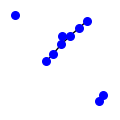

In [ ]:
generate_planar_graph(10, 10, True, f'connected.png')

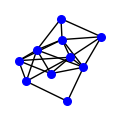

In [ ]:
generate_planar_graph(10, 10, False, f'disconnected.png')

In [ ]:
inputs = []
results = []

for i in range(15000, 30000):
  if i % 1000 == 0:
    print(i)
  inputs.append(to_nparray(f'/content/drive/MyDrive/training_data/connected_{i+1}.png'))
  results.append(1)
for i in range(15000, 30000):
  if i % 1000 == 0:
    print(i)
  inputs.append(to_nparray(f'/content/drive/MyDrive/training_data/disconnected_{i+1}.png'))
  results.append(0)

data = [inputs, results]

filename = '/content/drive/MyDrive/training2.pkl.gz'

with gzip.open(filename, 'wb') as f:
    pickle.dump(data, f)

In [ ]:
K3 = nx.complete_graph(3)
is_planar, P = nx.check_planarity(K3)
print(is_planar)

True


In [ ]:
K4 = nx.complete_graph(4)
is_planar, P = nx.check_planarity(K4)
print(is_planar)

True


In [ ]:
K5 = nx.complete_graph(5)
is_planar, P = nx.check_planarity(K5)
print(is_planar)

False
